# Data Source 4 - Migration

### Raw Data Source

https://www.census.gov/data/tables/2020/demo/geographic-mobility/metro-to-metro-migration.html


### Explanation about data

PDF: https://www.census.gov/programs-surveys/acs/technical-documentation/code-lists.html

- Code Lists, Definitions, and Accuracy

In [16]:
import sys
sys.path.append('../../scripts')  
import merging_utils
import yaml
import pandas as pd
import numpy as np

with open("../../config/preprocessing.yaml", "r") as f:
    preprocessing_config = yaml.safe_load(f)

prefix = preprocessing_config['migration']['prefix']
exclude_region = preprocessing_config['migration']['exclude_region']

In [17]:
file_name = '../../data/raw/metro-to-metro-ins-outs-nets-gross-2016-2020.xlsx'

## Set the header

In [18]:
df = pd.read_excel(file_name)

In [19]:
# multi-row column headers
df.head(5)

,Table with column headers in rows 2 through 3.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Metro Code of Geography A1,Metro Code of Geography B1,Metro Statistical Area of Geography A,Metro Statistical Area of Geography B,Flow from Geography B to Geography A,NaN,Counterflow from Geography A to Geography B2,NaN,Net Migration from Geography B to Geography A2,NaN,Gross Migration between Geography A and Geogra...,NaN
1,NaN,NaN,NaN,NaN,Estimate,MOE,Estimate,MOE,Estimate,MOE,Estimate,MOE
2,10180,10740,"Abilene, TX Metro Area","Albuquerque, NM Metro Area",55,65,0,NaN,55,65,55,65
3,10180,11100,"Abilene, TX Metro Area","Amarillo, TX Metro Area",461,292,118,88,343,294,579,316
4,10180,11260,"Abilene, TX Metro Area","Anchorage, AK Metro Area",0,NaN,35,34,-35,34,35,34


In [20]:
df.columns[0]

'Table with column headers in rows 2 through 3.'

## Multi level Column

In [21]:
# multi-level column index (row 1 and 2)
df = pd.read_excel(file_name, header=[1, 2])

In [22]:
df.head(3)

Metro Code of Geography A1 Metro Code of Geography B1  \
          Unnamed: 0_level_1         Unnamed: 1_level_1   
0                      10180                      10740   
1                      10180                      11100   
2                      10180                      11260   

  Metro Statistical Area of Geography A Metro Statistical Area of Geography B  \
                     Unnamed: 2_level_1                    Unnamed: 3_level_1   
0                Abilene, TX Metro Area            Albuquerque, NM Metro Area   
1                Abilene, TX Metro Area               Amarillo, TX Metro Area   
2                Abilene, TX Metro Area              Anchorage, AK Metro Area   

  Flow from Geography B to Geography A         \
                              Estimate    MOE   
0                                 55.0   65.0   
1                                461.0  292.0   
2                                  0.0    NaN   

  Counterflow from Geography A to Geography B2        \
                                      Estimate   MOE   
0                                          0.0   NaN   
1                                        118.0  88.0   
2                                         35.0  34.0   

  Net Migration from Geography B to Geography A2         \
                                        Estimate    MOE   
0                                           55.0   65.0   
1                                          343.0  294.0   
2                                          -35.0   34.0   

  Gross Migration between Geography A and Geography B2         
                                              Estimate    MOE  
0                                               55.0     65.0  
1                                              579.0    316.0  
2                                               35.0     34.0

In [23]:
df.columns = [
    '_'.join([str(i).strip() for i in col if str(i).strip().lower() != 'nan' and not str(i).startswith('Unnamed')])
    for col in df.columns
]

In [24]:
df.head(3)

,Metro Code of Geography A1,Metro Code of Geography B1,Metro Statistical Area of Geography A,Metro Statistical Area of Geography B,Flow from Geography B to Geography A_Estimate,Flow from Geography B to Geography A_MOE,Counterflow from Geography A to Geography B2_Estimate,Counterflow from Geography A to Geography B2_MOE,Net Migration from Geography B to Geography A2_Estimate,Net Migration from Geography B to Geography A2_MOE,Gross Migration between Geography A and Geography B2_Estimate,Gross Migration between Geography A and Geography B2_MOE
0,10180,10740,"Abilene, TX Metro Area","Albuquerque, NM Metro Area",55.0,65.0,0.0,NaN,55.0,65.0,55.0,65.0
1,10180,11100,"Abilene, TX Metro Area","Amarillo, TX Metro Area",461.0,292.0,118.0,88.0,343.0,294.0,579.0,316.0
2,10180,11260,"Abilene, TX Metro Area","Anchorage, AK Metro Area",0.0,NaN,35.0,34.0,-35.0,34.0,35.0,34.0


## Delete the footnote

In [25]:
df.tail(10)

,Metro Code of Geography A1,Metro Code of Geography B1,Metro Statistical Area of Geography A,Metro Statistical Area of Geography B,Flow from Geography B to Geography A_Estimate,Flow from Geography B to Geography A_MOE,Counterflow from Geography A to Geography B2_Estimate,Counterflow from Geography A to Geography B2_MOE,Net Migration from Geography B to Geography A2_Estimate,Net Migration from Geography B to Geography A2_MOE,Gross Migration between Geography A and Geography B2_Estimate,Gross Migration between Geography A and Geography B2_MOE
71487,SAM--,49700,South America,"Yuba City, CA Metro Area",NaN,NaN,6.0,10.0,NaN,NaN,NaN,NaN
71488,SAM--,49740,South America,"Yuma, AZ Metro Area",NaN,NaN,4.0,7.0,NaN,NaN,NaN,NaN
71489,SAM--,99999,South America,Outside Metro Area within U.S. or Puerto Rico,NaN,NaN,6811.0,909.0,NaN,NaN,NaN,NaN
71490,Footnotes:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71491,1The February 2017 Metropolitan Statistical Ar...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71492,2Not available when Geography A or B is a U.S....,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71493,Blank cells represent estimates that are not a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71494,MOE - Margin of error based on 90% confidence ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71495,The Census Bureau reviewed this data product f...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71496,"Source: U.S. Census Bureau, 2016-2020 American...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df = df.iloc[:-7]

In [27]:
# no footnote included
df

,Metro Code of Geography A1,Metro Code of Geography B1,Metro Statistical Area of Geography A,Metro Statistical Area of Geography B,Flow from Geography B to Geography A_Estimate,Flow from Geography B to Geography A_MOE,Counterflow from Geography A to Geography B2_Estimate,Counterflow from Geography A to Geography B2_MOE,Net Migration from Geography B to Geography A2_Estimate,Net Migration from Geography B to Geography A2_MOE,Gross Migration between Geography A and Geography B2_Estimate,Gross Migration between Geography A and Geography B2_MOE
0,10180,10740,"Abilene, TX Metro Area","Albuquerque, NM Metro Area",55.0,65.0,0.0,NaN,55.0,65.0,55.0,65.0
1,10180,11100,"Abilene, TX Metro Area","Amarillo, TX Metro Area",461.0,292.0,118.0,88.0,343.0,294.0,579.0,316.0
2,10180,11260,"Abilene, TX Metro Area","Anchorage, AK Metro Area",0.0,NaN,35.0,34.0,-35.0,34.0,35.0,34.0
3,10180,12060,"Abilene, TX Metro Area","Atlanta-Sandy Springs-Alpharetta, GA Metro Area",14.0,20.0,83.0,120.0,-69.0,121.0,97.0,122.0
4,10180,12220,"Abilene, TX Metro Area","Auburn-Opelika, AL Metro Area",16.0,20.0,0.0,NaN,16.0,20.0,16.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...
71485,SAM--,49620,South America,"York-Hanover, PA Metro Area",NaN,NaN,44.0,46.0,NaN,NaN,NaN,NaN
71486,SAM--,49660,South America,"Youngstown-Warren-Boardman, OH-PA Metro Area",NaN,NaN,35.0,41.0,NaN,NaN,NaN,NaN
71487,SAM--,49700,South America,"Yuba City, CA Metro Area",NaN,NaN,6.0,10.0,NaN,NaN,NaN,NaN
71488,SAM--,49740,South America,"Yuma, AZ Metro Area",NaN,NaN,4.0,7.0,NaN,NaN,NaN,NaN


## Removing Footnote markers

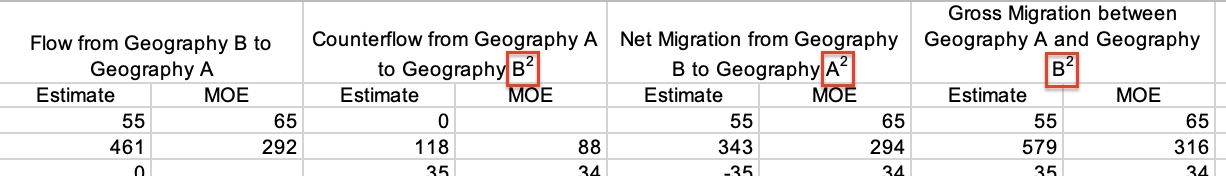

In [28]:
df.head(3)

,Metro Code of Geography A1,Metro Code of Geography B1,Metro Statistical Area of Geography A,Metro Statistical Area of Geography B,Flow from Geography B to Geography A_Estimate,Flow from Geography B to Geography A_MOE,Counterflow from Geography A to Geography B2_Estimate,Counterflow from Geography A to Geography B2_MOE,Net Migration from Geography B to Geography A2_Estimate,Net Migration from Geography B to Geography A2_MOE,Gross Migration between Geography A and Geography B2_Estimate,Gross Migration between Geography A and Geography B2_MOE
0,10180,10740,"Abilene, TX Metro Area","Albuquerque, NM Metro Area",55.0,65.0,0.0,NaN,55.0,65.0,55.0,65.0
1,10180,11100,"Abilene, TX Metro Area","Amarillo, TX Metro Area",461.0,292.0,118.0,88.0,343.0,294.0,579.0,316.0
2,10180,11260,"Abilene, TX Metro Area","Anchorage, AK Metro Area",0.0,NaN,35.0,34.0,-35.0,34.0,35.0,34.0


In [29]:
import re
print(df.columns)
df.columns = [re.sub(r'(Geography [AB])\d+', r'\1', col) for col in df.columns]
print(df.columns)

Index(['Metro Code of Geography A1', 'Metro Code of Geography B1',
       'Metro Statistical Area of Geography A',
       'Metro Statistical Area of Geography B',
       'Flow from Geography B to Geography A_Estimate',
       'Flow from Geography B to Geography A_MOE',
       'Counterflow from Geography A to Geography B2_Estimate',
       'Counterflow from Geography A to Geography B2_MOE',
       'Net Migration from Geography B to Geography A2_Estimate',
       'Net Migration from Geography B to Geography A2_MOE',
       'Gross Migration between Geography A and Geography B2_Estimate',
       'Gross Migration between Geography A and Geography B2_MOE'],
      dtype='object')
Index(['Metro Code of Geography A', 'Metro Code of Geography B',
       'Metro Statistical Area of Geography A',
       'Metro Statistical Area of Geography B',
       'Flow from Geography B to Geography A_Estimate',
       'Flow from Geography B to Geography A_MOE',
       'Counterflow from Geography A to Geography 

In [30]:
df.to_csv('../../data/interim/data4_migration_before_msa_level.csv',index=False)

## Group by - MSA Level

## ACS data aggregation method (PDF from the Bureau of Census)

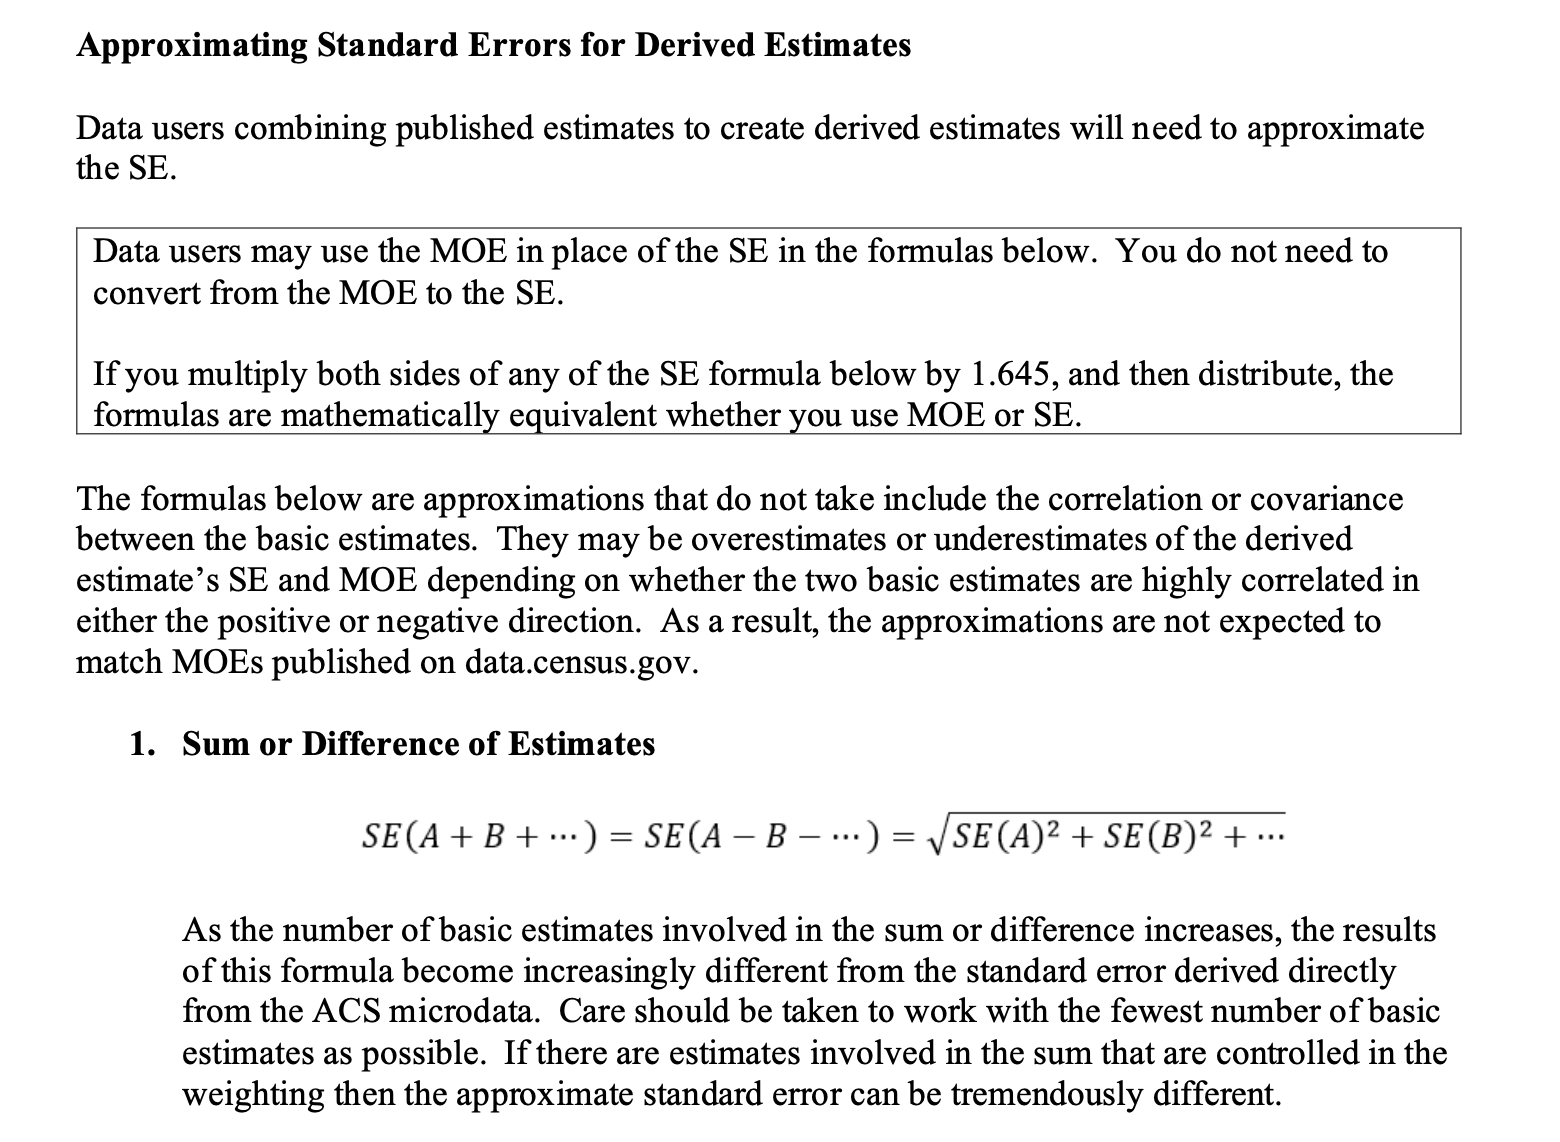

### Exclude unnecessary columns

In [16]:
df_filtered = df[
    (~df['Metro Code of Geography A'].isin(exclude_region)) &
    (~df['Metro Code of Geography B'].isin(exclude_region))
]

In [17]:
# List of estimate and MOE column name pairs
estimate_moe_pairs = [
    ('Flow from Geography B to Geography A_Estimate', 'Flow from Geography B to Geography A_MOE'),
    ('Counterflow from Geography A to Geography B_Estimate', 'Counterflow from Geography A to Geography B_MOE'),
    ('Net Migration from Geography B to Geography A_Estimate', 'Net Migration from Geography B to Geography A_MOE'),
    ('Gross Migration between Geography A and Geography B_Estimate', 'Gross Migration between Geography A and Geography B_MOE')
]


# Function to sum estimates and calculate combined MOEs
# calculation method in PDF "Instructions for Applying Statistical Testing to American Community Survey Data" page 3
def aggregate_msa_level(df, group_col='Metro Code of Geography A'):
    grouped = df.groupby(group_col)
    result = grouped.agg(
        {est: 'sum' for est, _ in estimate_moe_pairs} |
        {moe: lambda x: np.sqrt((x**2).sum()) for _, moe in estimate_moe_pairs}
    ).reset_index()
    return result

# Apply the function
msa_level_df = aggregate_msa_level(df_filtered)

In [18]:
# Column B =  Column C + Column D
msa_level_df

,Metro Code of Geography A,Flow from Geography B to Geography A_Estimate,Counterflow from Geography A to Geography B_Estimate,Net Migration from Geography B to Geography A_Estimate,Gross Migration between Geography A and Geography B_Estimate,Flow from Geography B to Geography A_MOE,Counterflow from Geography A to Geography B_MOE,Net Migration from Geography B to Geography A_MOE,Gross Migration between Geography A and Geography B_MOE
0,10180,14074.0,12714.0,1360.0,26788.0,1184.831634,1675.577811,2061.050218,2043.932973
1,10380,3447.0,11070.0,-7623.0,14517.0,639.049294,1348.850251,1486.460225,1498.274674
2,10420,29065.0,29891.0,-826.0,58956.0,1763.152007,1855.395645,2517.326161,2601.782274
3,10500,7484.0,8209.0,-725.0,15693.0,921.422813,1112.300769,1464.927643,1423.935392
4,10540,7909.0,8064.0,-155.0,15973.0,982.065171,1050.037142,1462.427092,1412.962137
...,...,...,...,...,...,...,...,...,...
388,49620,18852.0,16248.0,2604.0,35100.0,1589.392337,1311.660017,2035.941551,2083.977447
389,49660,16608.0,20660.0,-4052.0,37268.0,1334.733307,1561.505684,2083.977207,2023.048937
390,49700,9397.0,8819.0,578.0,18216.0,1108.535971,1082.295708,1533.987288,1564.734802
391,49740,12203.0,10014.0,2189.0,22217.0,1338.216350,1159.471863,1799.591620,1741.030155


## Column readability

### Rename columns to reflect their meanings

In [19]:
msa_level_df = msa_level_df.rename(columns={
    'Flow from Geography B to Geography A_Estimate': 'A_Inflow_Estimate',
    'Flow from Geography B to Geography A_MOE': 'A_Inflow_MOE',
    'Counterflow from Geography A to Geography B_Estimate': 'A_Outflow_Estimate',
    'Counterflow from Geography A to Geography B_MOE': 'A_Outflow_MOE',
    'Net Migration from Geography B to Geography A_Estimate': 'A_NetMigration_Estimate',
    'Net Migration from Geography B to Geography A_MOE': 'A_NetMigration_MOE',
    'Gross Migration between Geography A and Geography B_Estimate': 'A_GrossMigration_Estimate',
    'Gross Migration between Geography A and Geography B_MOE': 'A_GrossMigration_MOE'
})

## Adding Prefixes in columns

In [20]:
print('Before adding prefixes: ' , msa_level_df.columns)
msa_level_df = merging_utils.add_prefix_all(msa_level_df, prefix=prefix)
print()
print('After adding prefixes: ' , msa_level_df.columns)

Before adding prefixes:  Index(['Metro Code of Geography A', 'A_Inflow_Estimate', 'A_Outflow_Estimate',
       'A_NetMigration_Estimate', 'A_GrossMigration_Estimate', 'A_Inflow_MOE',
       'A_Outflow_MOE', 'A_NetMigration_MOE', 'A_GrossMigration_MOE'],
      dtype='object')

After adding prefixes:  Index(['Migration16to20_Metro Code of Geography A',
       'Migration16to20_A_Inflow_Estimate',
       'Migration16to20_A_Outflow_Estimate',
       'Migration16to20_A_NetMigration_Estimate',
       'Migration16to20_A_GrossMigration_Estimate',
       'Migration16to20_A_Inflow_MOE', 'Migration16to20_A_Outflow_MOE',
       'Migration16to20_A_NetMigration_MOE',
       'Migration16to20_A_GrossMigration_MOE'],
      dtype='object')


In [21]:
msa_level_df.to_csv('../../data/interim/data4_migration.csv',index=False)